In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
from gensim.models import Word2Vec

In [3]:
f=open("Desktop/Natural Language Processing/hurriyet.txt","r",encoding="utf8")

In [4]:
text=f.read()

In [5]:
t_list=text.split("\n")

In [6]:
corpus=[]
for cumle in t_list:
    corpus.append(cumle.split())

In [7]:
corpus[:10]

[['iran',
  'devlet',
  'televizyonu',
  'ülkedeki',
  'eyaletin',
  'sinde',
  'yapılan',
  'reformcuları',
  'protesto',
  'amaçlı',
  'yürüyüşlere',
  'milyonlarca',
  'kişinin',
  'katıldığını',
  'bildirdi'],
 ['gösterilerde',
  'fitnecilere',
  'ölüm',
  'münafıklara',
  'ölüm',
  'abd',
  'ye',
  'ölüm',
  'ingiltere',
  'ye',
  'ölüm',
  'sloganları',
  'atıldı'],
 ['dini',
  'lider',
  'ali',
  'hamaney',
  've',
  'cumhurbaşkanı',
  'mahmud',
  'ahmedinejad',
  'ı',
  'destekleyen',
  'iranlılar',
  'son',
  'olaylarda',
  'yeğeni',
  'öldürülen',
  'mir',
  'hüseyin',
  'musevi',
  'başta',
  'olmak',
  'üzere',
  'muhalefet',
  'liderlerini',
  'kınadılar'],
 ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'],
 ['muhalefet',
  'liderleri',
  'kaçtı',
  'mı',
  'aşure',
  'günü',
  'yaşanan',
  'çatışmalarda',
  'devlet',
  'kaynaklarına',
  'göre',
  'u',
  'terörist',
  'olmak',
  'üzere',
  'kişi',
  'ölmüştü'],
 ['den',
  'fazla',
  'kişinin',
  'yar

## Model Eğitimi

In [8]:
model=Word2Vec(corpus,vector_size=100,window=5,min_count=5,sg=1) #modeli eğittik

In [9]:
model.wv['ankara'] 

array([-0.06491051, -0.25417227, -0.30421117,  0.15544514,  0.95448506,
        0.17903091,  0.07550444,  0.5504578 , -0.10225145, -0.4194786 ,
        0.30292597, -0.52493316, -0.11561286,  0.10819723,  0.20124812,
        0.25115725,  0.3798997 , -0.30349392, -0.22926325, -0.7391313 ,
       -0.07850606,  0.29345277,  0.6924608 , -0.92635566, -0.4404508 ,
        0.5101039 , -0.3028148 ,  0.13319252, -0.5230514 ,  0.39994332,
        0.01294819,  0.10975012,  0.04597149, -0.23170863, -0.16727792,
       -0.12741672, -0.28586268, -0.14821564, -0.3311971 , -0.49195072,
        0.43870965, -0.04223093,  0.14252602,  0.08133671,  0.5442761 ,
        0.28906804, -0.41666046, -0.29226083,  0.00823305, -0.39355433,
       -0.10662516, -0.14014222,  0.07379385, -0.10664752,  0.15960488,
       -0.08063429, -0.14768767, -0.15457231,  0.0023997 , -0.22408718,
        0.18896355,  0.2678193 , -0.10534786,  0.25243437, -0.01994718,
       -0.09408337, -0.03294057,  0.09806815, -0.01500856, -0.25

## modelin hollandayla yakın olan kelimeleri bulmasını sağladık

In [10]:
model.wv.most_similar('hollanda') 

[('danimarka', 0.8420475721359253),
 ('avusturya', 0.8123382329940796),
 ('belçika', 0.7653858065605164),
 ('almanya', 0.7535499930381775),
 ('kanada', 0.7526580095291138),
 ('finlandiya', 0.7325844764709473),
 ('avustralya', 0.7231132984161377),
 ('ispanya', 0.7225276827812195),
 ('estonya', 0.7060681581497192),
 ('lüksemburg', 0.7059690952301025)]

In [11]:
model.wv.most_similar('pazartesi')

[('perşembe', 0.9179185032844543),
 ('cumartesi', 0.913104236125946),
 ('salı', 0.9057130813598633),
 ('çarşamba', 0.9026883244514465),
 ('cuma', 0.8897404670715332),
 ('günü', 0.8870686292648315),
 ('akşamı', 0.8546805381774902),
 ('pazar', 0.8234137892723083),
 ('sabahı', 0.8109613060951233),
 ('gününden', 0.739665150642395)]

In [12]:
model.wv.most_similar('youtube')

[('twitter', 0.7885500192642212),
 ('facebook', 0.7544019818305969),
 ('paylaşım', 0.7401643991470337),
 ('whatsapp', 0.724431574344635),
 ('internete', 0.7185050845146179),
 ('twıtter', 0.7070832848548889),
 ('sitelerine', 0.6860633492469788),
 ('internette', 0.680704653263092),
 ('etiketiyle', 0.6786379814147949),
 ('internetteki', 0.6770379543304443)]

In [13]:
model.save('word2vec.model')

In [14]:
model=Word2Vec.load("word2vec.model")

In [18]:
def closestwords_tsneplot(model,word):
    word_vectors=np.empty((0,100)) # fonksiyonun aldığı kelimeye yakın olan kelimelerin vektörlerini tutacak
    word_labels=[word]
    close_words=model.wv.most_similar(word)
    word_vectors=np.append(word_vectors,np.array([model.wv[word]]),axis=0)
    for w,_ in close_words: #score değerine ihtiyaç olmadığı için _ kullandık
        word_labels.append(w)
        word_vectors=np.append(word_vectors,np.array([model.wv[w]]),axis=0)
        
    tsne =TSNE(random_state=0)
    Y=tsne.fit_transform(word_vectors)
    
    x_coords=Y[:,0]
    y_coords=Y[:,1]
    plt.scatter(x_coords,y_coords)
    for label,x,y in zip(word_labels,x_coords,y_coords):
        plt.annotate(label,xy=(x,y),xytext=(5,-2),textcoords='offset points')
        
    plt.show()

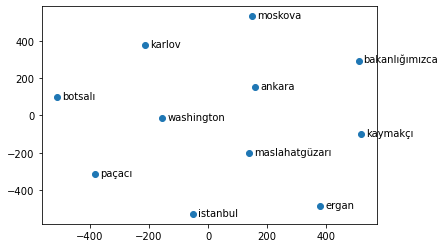

In [20]:
closestwords_tsneplot(model,'ankara')

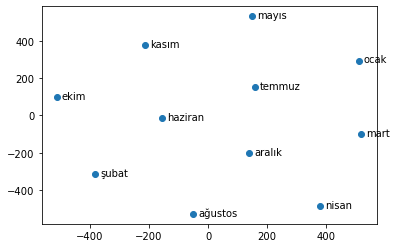

In [21]:
closestwords_tsneplot(model,'temmuz')

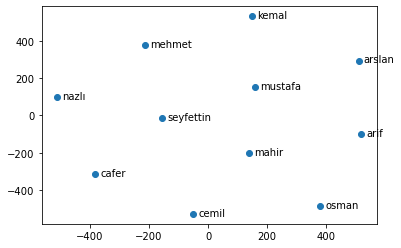

In [22]:
closestwords_tsneplot(model,'mustafa')

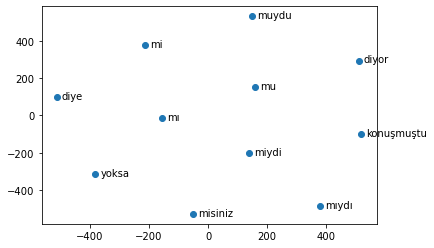

In [23]:
closestwords_tsneplot(model,'mu')